Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 


Exploratory Data Analysis (EDA):

1.	Load the Titanic dataset using Python's pandas library
   .3
2.	Check for missing value
   s5
3.	Explore data distributions using histograms and box plo
   t7.
4.	Visualize relationships between features and survival using scatter plots and bar plots.


Data Preprocessing:

1.	Impute missing values
   .3
2.	Encode categorical variables using one-hot encoding or label encodin
   .5
3.	If needed you can apply more preprocessing methods on the given dataset.


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install lightgbm
from xgboost import XGBClassifier
import lightgbm as lgb
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [90]:
df_train = pd.read_csv('Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
df_test = pd.read_csv('Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [92]:
df_train = df_train.drop(columns=['Name'])
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [93]:
df_train.duplicated().sum() # no duplicate records

np.int64(0)

In [94]:
df_test.duplicated().sum()    #no duplicate records

np.int64(0)

In [95]:
df_train.describe()    # gives the descriptive statistics for numerical column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
df_test.describe()     # gives the descriptive statistics for numerical column

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [97]:
df_train.info()  # missing values:- Age , Cabin , Embarked  column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [98]:
df_test.info() # missing values in :- Age , Cabin  , Fare columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [99]:
df_train.describe(include=object) # gives the descriptive statistics for categorical column

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,G6,S
freq,577,7,4,644


In [108]:
df_test.describe(include=object)     # gives the descriptive statistics for categorical column

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peter, Master. Michael J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


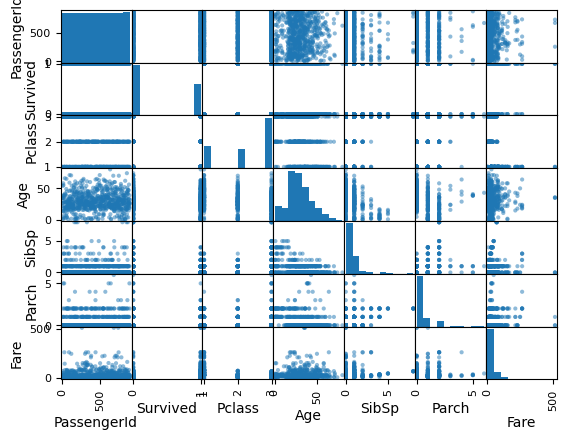

In [109]:
pd.plotting.scatter_matrix(df_train)
plt.show()

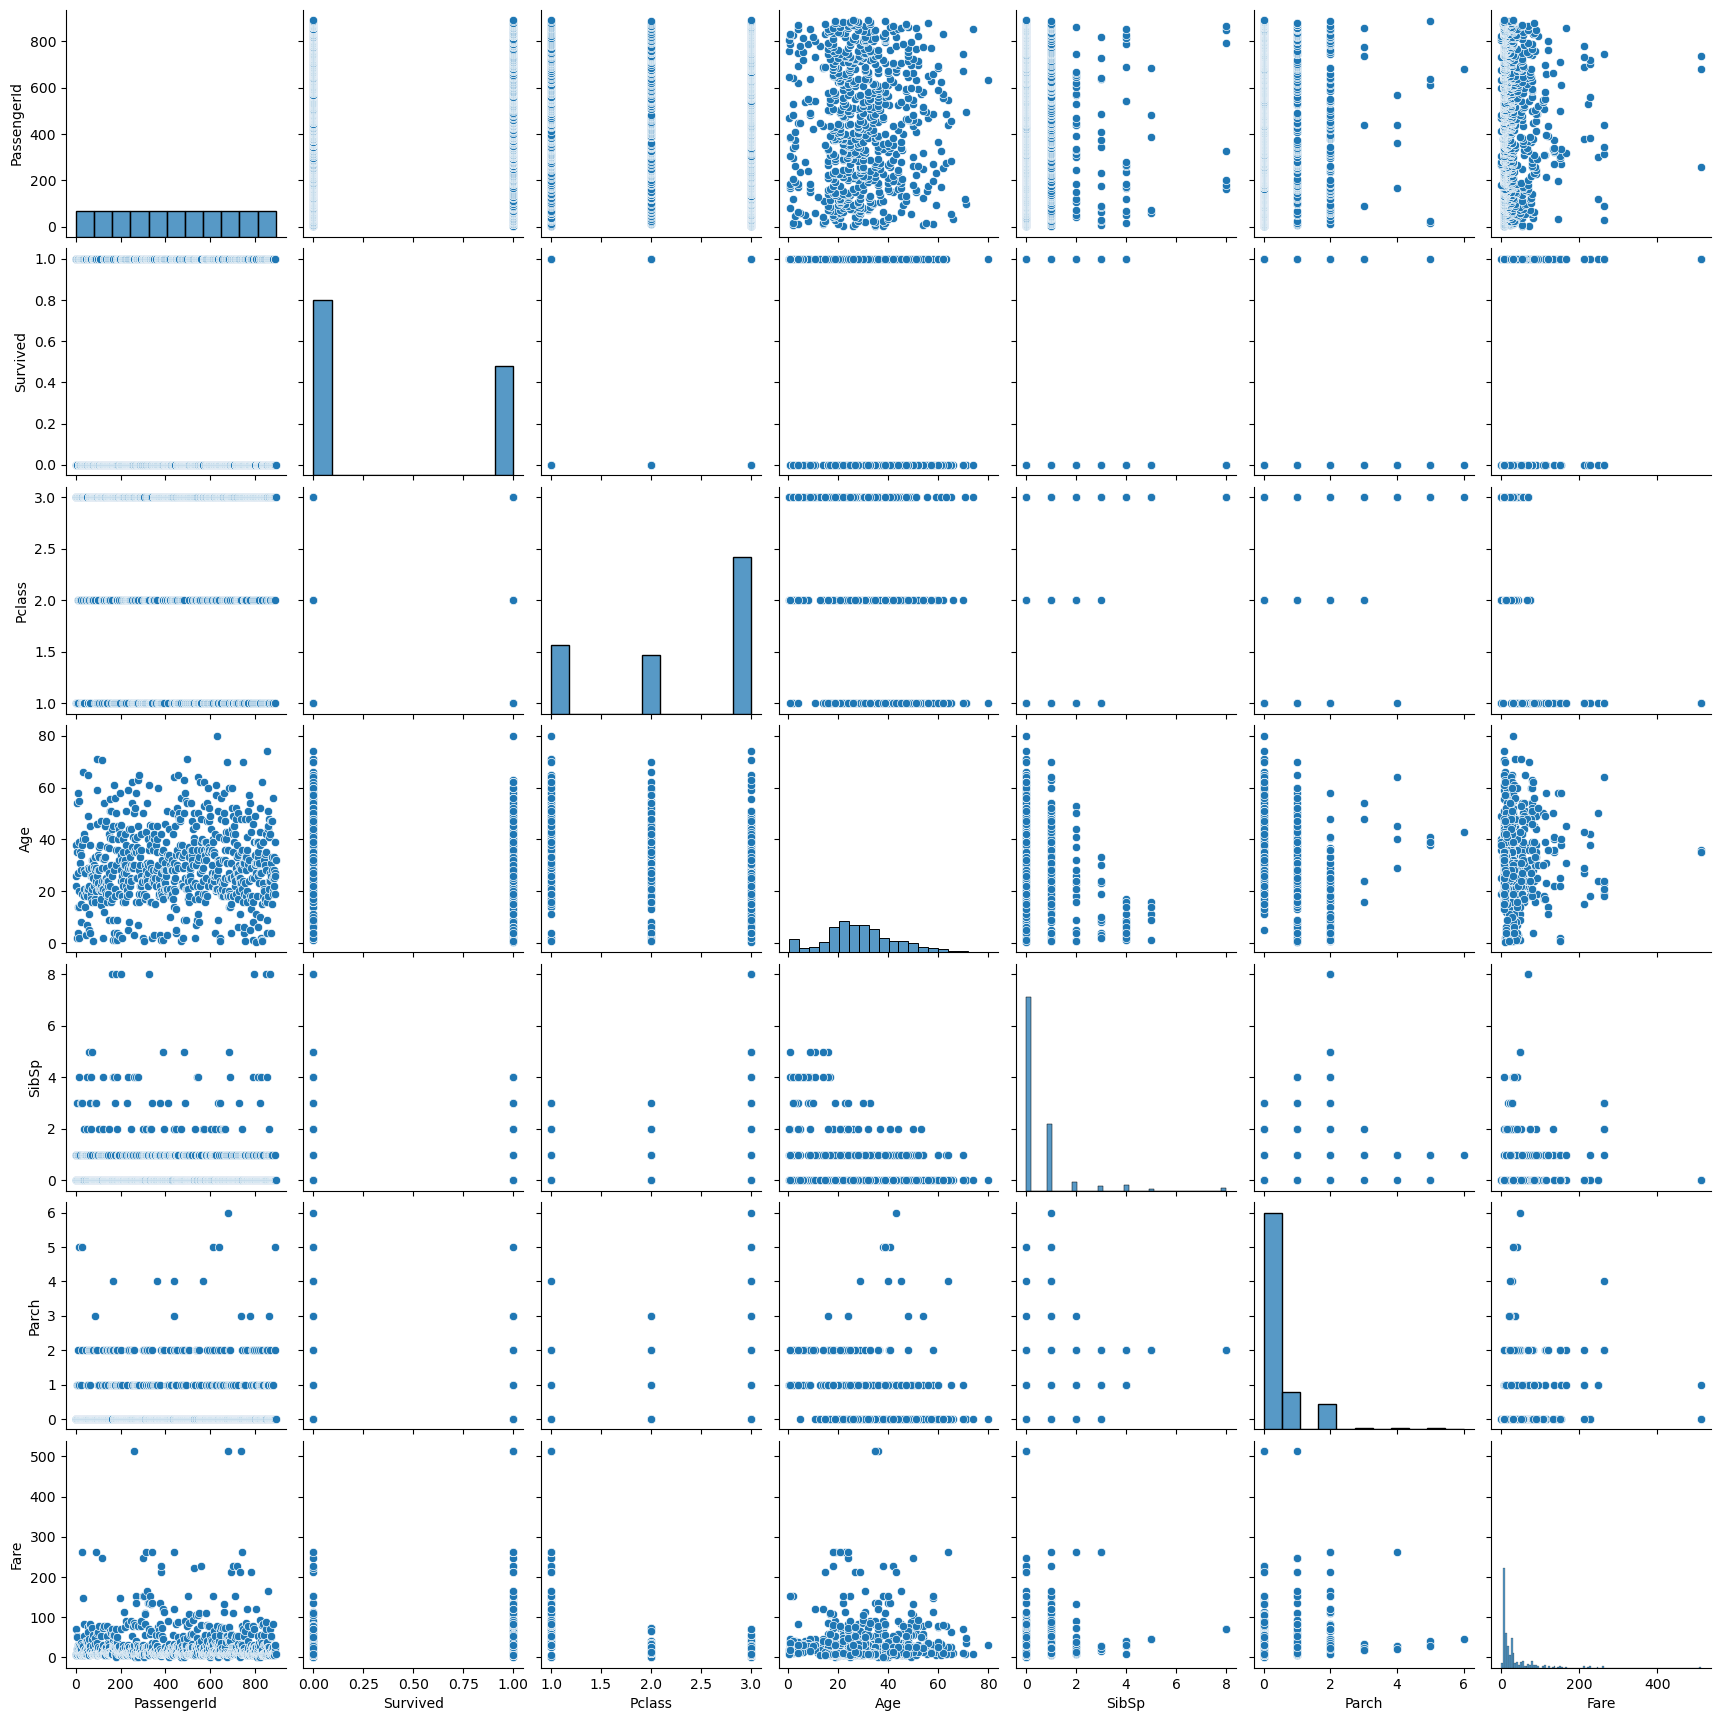

In [110]:
sns.pairplot(df_train)
plt.show()

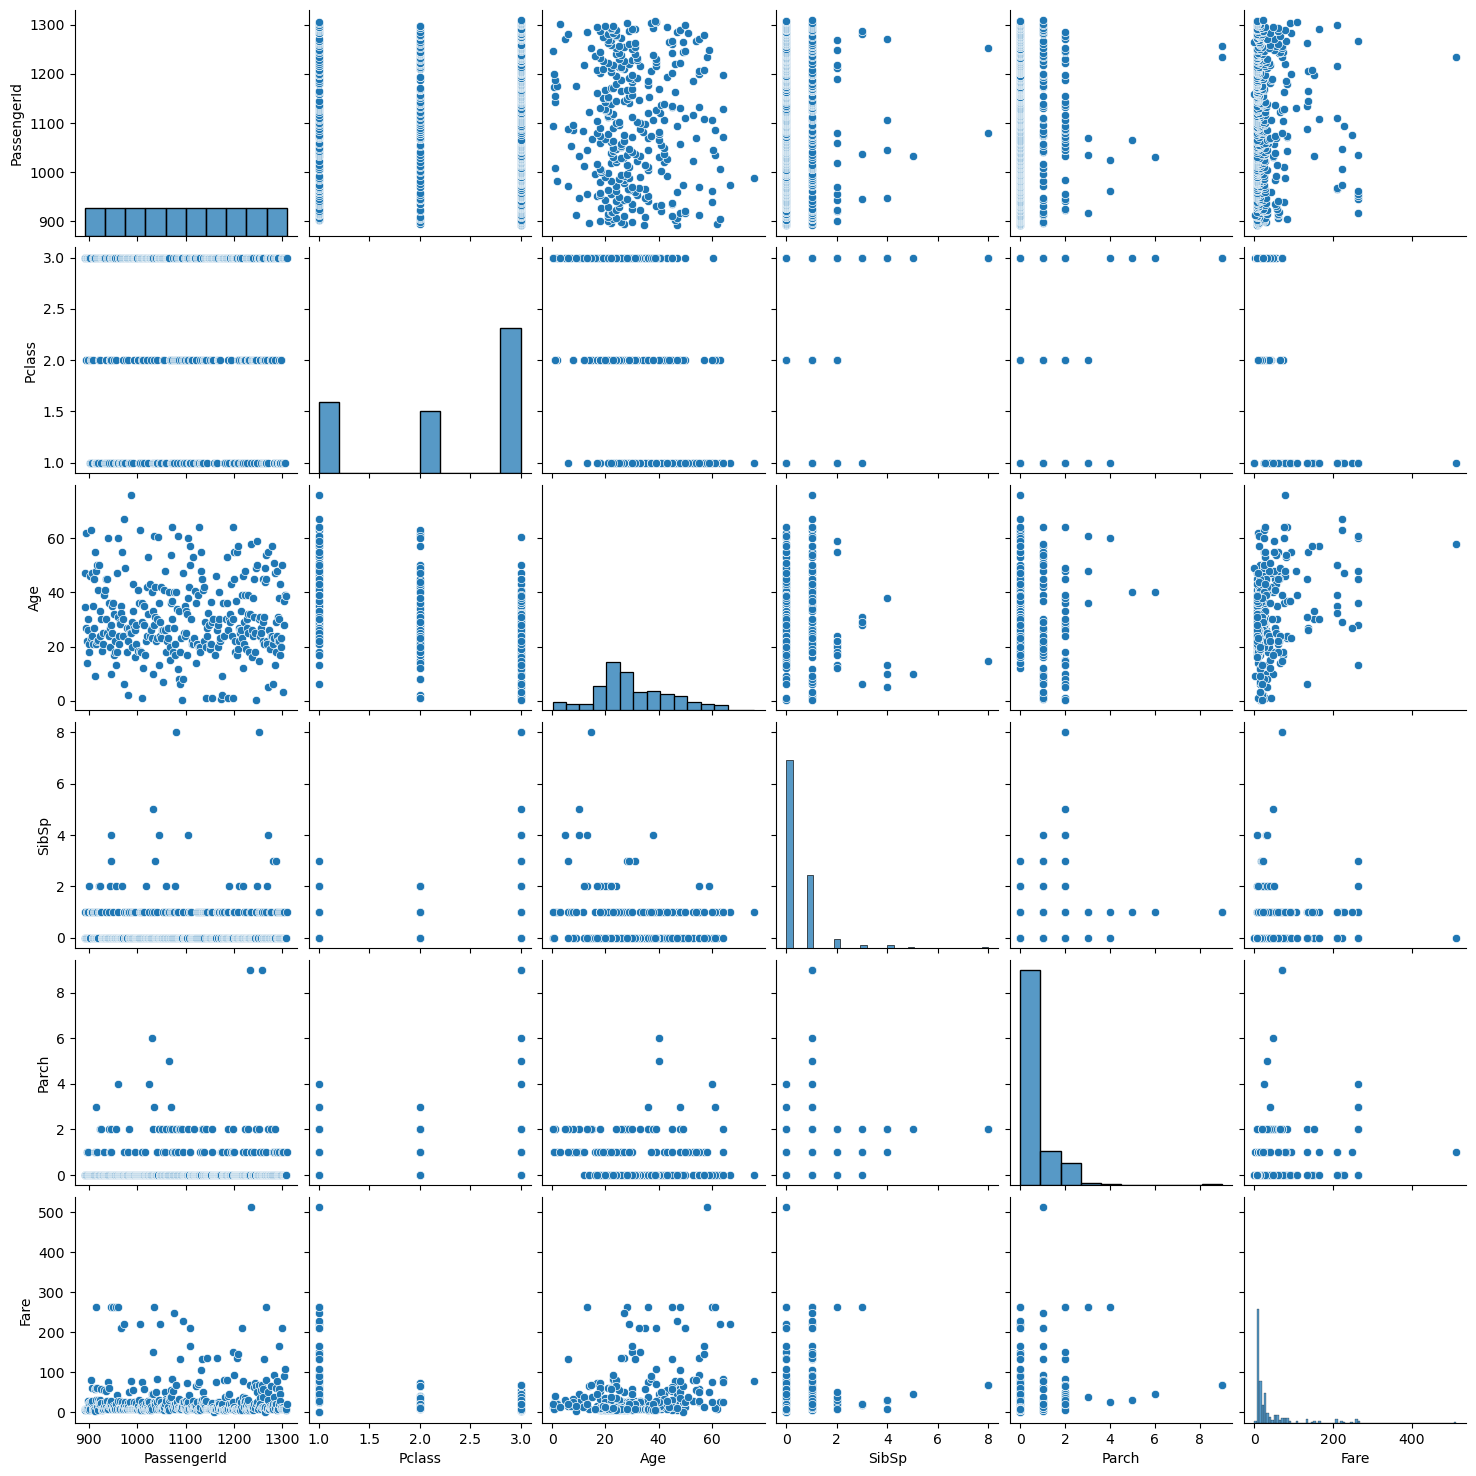

In [111]:
sns.pairplot(df_test)
plt.show()

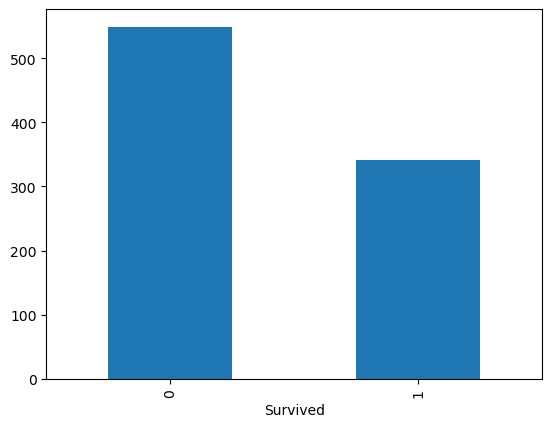

In [210]:
df_train['Survived'].value_counts().plot(kind='bar')
plt.show()

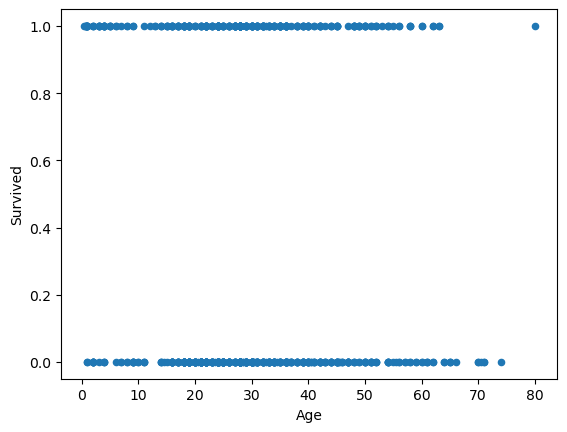

In [211]:
df_train.plot.scatter(x='Age',y='Survived')
plt.show()

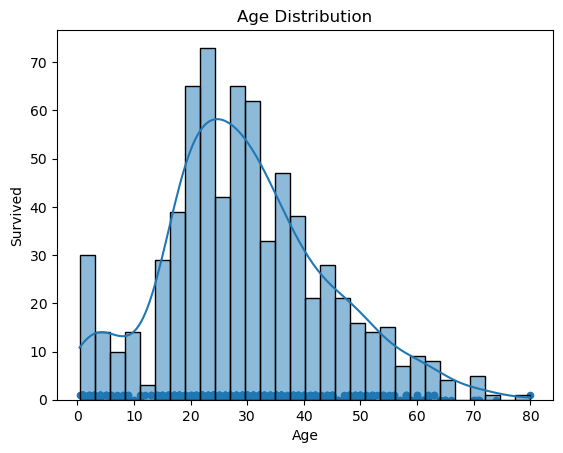

In [119]:
sns.histplot(df_train['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

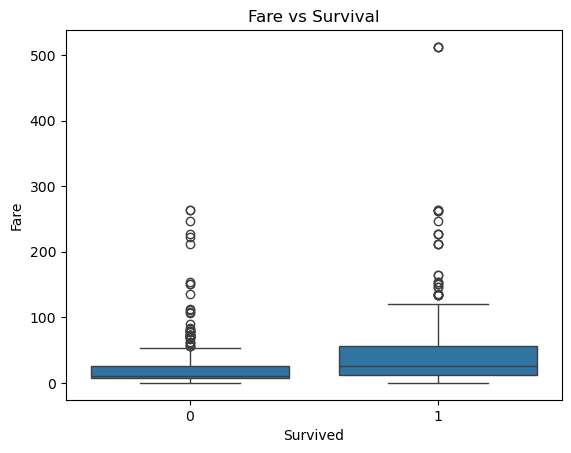

In [120]:
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title("Fare vs Survival")
plt.show()

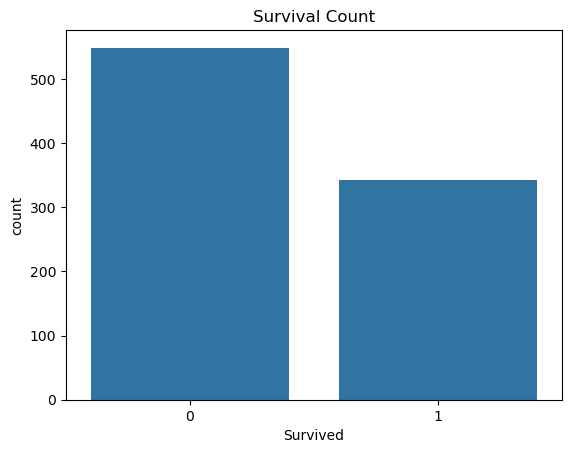

In [121]:
sns.countplot(x='Survived', data=df_train)
plt.title("Survival Count")
plt.show()

In [122]:
# Drop unnecessary columns
df_train.drop(columns=['PassengerId', 'Ticket', 'Cabin'], inplace=True)


In [123]:
df_train['Sex'].value_counts()    # can apply label encoding to this column

Sex
male      577
female    314
Name: count, dtype: int64

In [124]:
df_train['Embarked'].value_counts()     # can apply label encoding to this column

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [125]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [126]:
df_test['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [127]:
df_train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [128]:
df_test['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [28]:
df_train['Parch'].value_counts()


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [129]:
df_test['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [130]:
df_train.dtypes    # all columns are placed to there coreect datatypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [131]:
df_test.dtypes        #  all columns are placed to there coreect datatypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [132]:
df_train.shape

(891, 8)

In [133]:
df_test.shape

(418, 11)

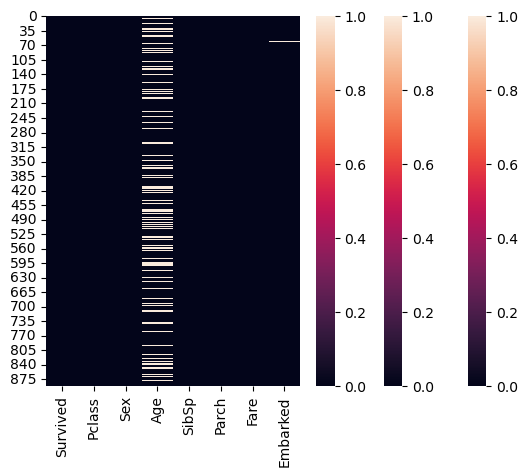

In [136]:
# visualize the missing values:-
sns.heatmap(df_train.isna())   # white horizontals are missing values
plt.show()

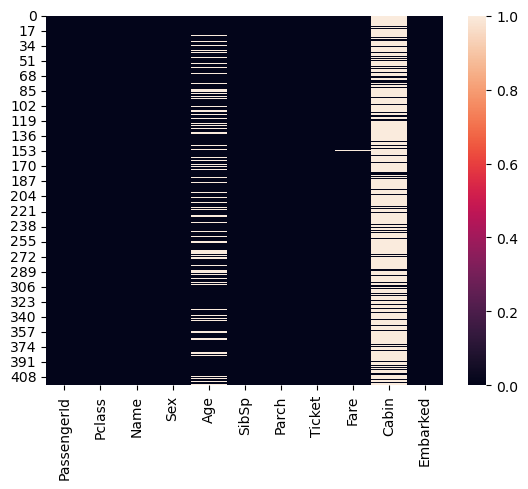

In [137]:
# visualize the missing values:-
sns.heatmap(df_test.isna())     # white horizontals are missing values
plt.show()

In [138]:
# missing values before encoding 
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [139]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [140]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specific column
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])


In [141]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specific column
df_test['Cabin'] = label_encoder.fit_transform(df_test['Cabin'])
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['Ticket'] = label_encoder.fit_transform(df_test['Ticket'])

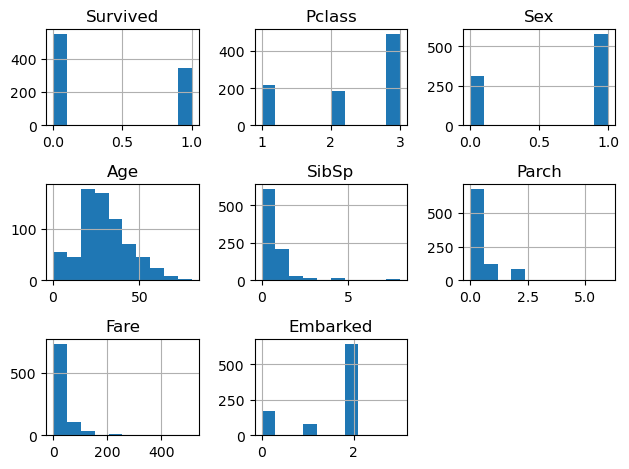

In [144]:
df_train.hist()
plt.tight_layout()
plt.show()

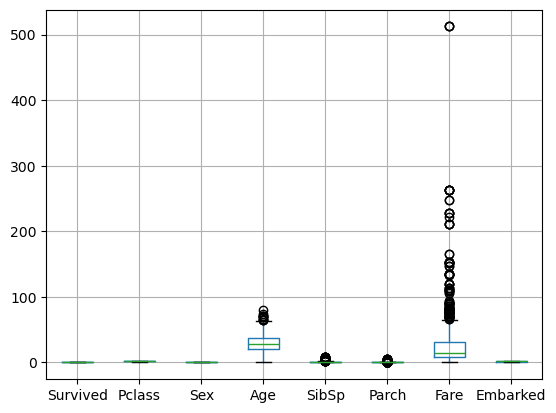

In [145]:
df_train.boxplot()   # outliers present in Age , SibSp , Prach , Fare , Ticket , Cabin, Embarked column
plt.show()

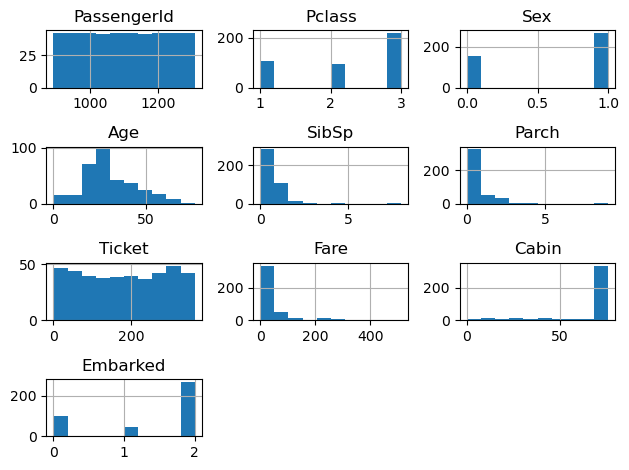

In [146]:
df_test.hist()
plt.tight_layout()
plt.show()

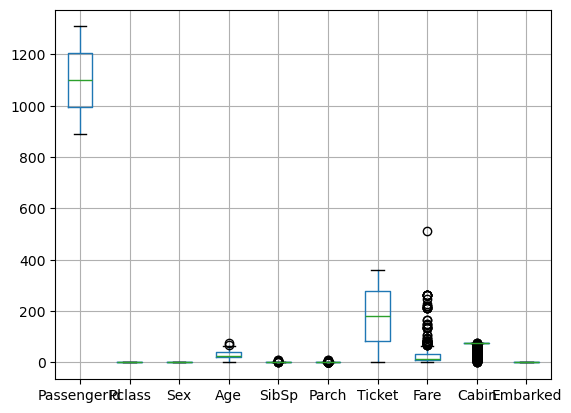

In [147]:
df_test.boxplot()    # outliers are ptresent in Age , SibSp , Prach , Fare , Ticket , Cabin , Embarked column
plt.show()

In [148]:
# missing values after encoding
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [149]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [150]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [151]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

In [152]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [153]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [50]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [154]:
# all missing values are treated

Building Predictive Models:

1	Split the preprocessed dataset into training and testing set.

2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3.Build predictive models using LightGBM and XGBoost algorithm.

4.Train the models on the training set and evaluate their performance on the testing.

5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.ce.


In [155]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [156]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
X = df_train.drop(columns=['Survived'])
Y=df_train['Survived']

In [157]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [158]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [159]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [160]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,4.0,0,2,81.8583,2
650,3,1,28.0,0,0,7.8958,2
172,3,0,1.0,1,1,11.1333,2
450,2,1,36.0,1,2,27.7500,2
314,2,1,43.0,1,1,26.2500,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [161]:
ytrain

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [162]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
821,3,1,27.0,0,0,8.6625,2
633,1,1,28.0,0,0,0.0000,2
456,1,1,65.0,0,0,26.5500,2
500,3,1,17.0,0,0,8.6625,2


In [163]:
ytest

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

In [164]:
xtrain.shape

(623, 7)

In [165]:
ytrain.shape

(623,)

In [166]:
xtest.shape

(268, 7)

In [167]:
ytest.shape

(268,)

In [177]:
# Build Individual Decision Tree Model
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print('Train Accuracy: ',dt.score(xtrain,ytrain))
print('Test Accuracy: ',dt.score(xtest,ytest))

Train Accuracy:  0.9807383627608347
Test Accuracy:  0.753731343283582


In [178]:
# model is overfitted as training contains total 100% accuracy 
# and here only 1 decision tree is created , which is overfitted

In [179]:
#Build individual model first. Check whether single model performing well or when we bagging, it is performing well.
# Build Individual Logistic Regression Model
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

print('Train Accuracy: ',lg.score(xtrain,ytrain))
print('Test Accuracy: ',lg.score(xtest,ytest))

Train Accuracy:  0.7993579454253612
Test Accuracy:  0.8134328358208955


In [68]:
#Avoid Repetitive task of model building by writing user defined function

In [180]:
def prediction(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
  print('Test Accuracy: ',model.score(xtest,ytest))


In [181]:
prediction(DecisionTreeClassifier())

Train Accuracy:  0.9807383627608347
Test Accuracy:  0.753731343283582


In [182]:
prediction(GradientBoostingClassifier())
#Overfitting is there so hypertune max_depth, no.of decision trees, learning rate alpha

Train Accuracy:  0.9036918138041734
Test Accuracy:  0.7985074626865671


In [173]:
# so wihtout hyperparameter tuning , it uses some parameters as default

In [183]:
# Hyperparameter tuning

In [184]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.6,0.7,0.9,1], # alpha between 0 to 1
    'max_depth' : [3,5,7,11]
}

In [185]:
# tuning GradientBoostingClassifier,verbose: print possible combinations or not,
# verbose=1 will not show combinations, it will show direct results
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)
# Controls the verbosity: the higher, the more messages.
# >1 : the computation time for each fold and parameter candidate is displayed;
# >2 : the score is also displayed;
# >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [189]:
grid.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 90}

In [190]:
prediction(GradientBoostingClassifier(learning_rate=0.9,max_depth=3,n_estimators=110))

Train Accuracy:  0.9807383627608347
Test Accuracy:  0.7649253731343284


In [191]:
df_train['Survived'].unique()

array([0, 1])

In [192]:
prediction(XGBClassifier(learning_rate = 0.9, max_depth = 5, n_estimators = 90))

Train Accuracy:  0.9775280898876404
Test Accuracy:  0.7649253731343284


Build Predictive Models with LightGBM and XGBoost using different method

Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models
   .3
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm


In [193]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(xtrain, ytrain)
y_pred_lgb = lgb_model.predict(xtest)

[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [198]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(xtrain, ytrain)
y_pred_xgb = xgb_model.predict(xtest)

In [199]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print("\n")

In [200]:
# Evaluate LightGBM
evaluate_model(ytest, y_pred_lgb, "LightGBM")

Performance Metrics for LightGBM:
Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1 Score: 0.75




In [201]:
# Evaluate XGBoost
evaluate_model(ytest, y_pred_xgb, "XGBoost")

Performance Metrics for XGBoost:
Accuracy: 0.78
Precision: 0.75
Recall: 0.70
F1 Score: 0.73




In [203]:
# Cross-validation for LightGBM
cv_scores_lgb = cross_val_score(lgb_model, X, Y, cv=5, scoring='accuracy')
print(f"LightGBM CV Accuracy: {cv_scores_lgb.mean():.2f}")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [204]:
# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [205]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(xtrain, ytrain)
best_xgb = grid_search.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search.best_params_}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

In [206]:
# Evaluate the best XGBoost model
y_pred_best_xgb = best_xgb.predict(xtest)
evaluate_model(ytest, y_pred_best_xgb, "Best XGBoost")

Performance Metrics for Best XGBoost:
Accuracy: 0.79
Precision: 0.81
Recall: 0.66
F1 Score: 0.73




In [207]:
# Comparison of metrics
results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(ytest, y_pred_lgb), accuracy_score(ytest, y_pred_xgb)],
    "Precision": [precision_score(ytest, y_pred_lgb), precision_score(ytest, y_pred_xgb)],
    "Recall": [recall_score(ytest, y_pred_lgb), recall_score(ytest, y_pred_xgb)],
    "F1 Score": [f1_score(ytest, y_pred_lgb), f1_score(ytest, y_pred_xgb)],
}

In [208]:
results_df = pd.DataFrame(results)

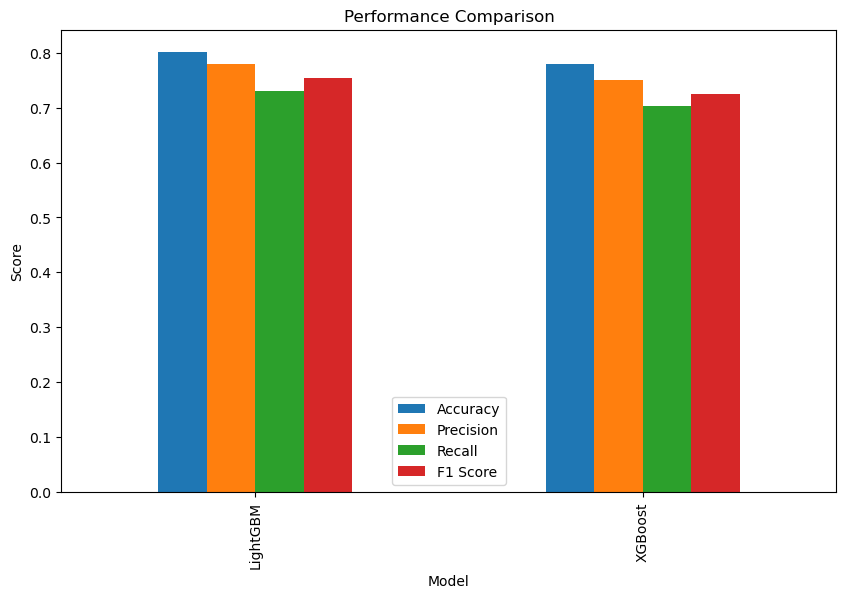

In [209]:
# Plot the results
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Performance Comparison")
plt.ylabel("Score")
plt.show()